In [1]:
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
Y_var_name = "child_mortality"

In [3]:
data_point_path = "../DS5500-Assignment-1/ddf--gapminder--systema_globalis/ddf--datapoints--"
entity_path = "../DS5500-Assignment-1/ddf--gapminder--systema_globalis/ddf--entities--"
country_table = pd.read_csv(entity_path + "geo--country.csv")


In [4]:
gdp_table = pd.read_csv(data_point_path + \
                        "income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv")

child_mortality = pd.read_csv(data_point_path +\
                              "child_mortality_0_5_year_olds_more_years_version_7--by--geo--time.csv")

gdp_child_mor_table = pd.merge(gdp_table, child_mortality, on=['geo', 'time'], how='left')
gdp_child_mor_table = gdp_child_mor_table.rename(columns={
                    "geo": "country",
                    "time" : "Year",
                    "income_per_person_gdppercapita_ppp_inflation_adjusted": "income",
                    "child_mortality_0_5_year_olds_more_years_version_7": "child_mortality"})
gdp_child_mor_table = pd.merge(gdp_child_mor_table, country_table, on='country', how='left')
gdp_child_mor_table = gdp_child_mor_table[["country", "Year", "income", 
                                         "child_mortality", "name", "world_4region"]]


In [5]:
gdp_child_mor_table = gdp_child_mor_table.dropna()
gdp_child_mor_table.head()

,country,Year,income,child_mortality,name,world_4region
0,afg,1800,603,468.6,Afghanistan,asia
1,afg,1801,603,468.6,Afghanistan,asia
2,afg,1802,603,468.6,Afghanistan,asia
3,afg,1803,603,468.6,Afghanistan,asia
4,afg,1804,603,468.6,Afghanistan,asia


In [6]:
X = [[x] for x in gdp_child_mor_table["income"]]
reg = LinearRegression().fit(X, gdp_child_mor_table[Y_var_name])
Y = reg.predict(X)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
reg = LinearRegression().fit(X_poly, gdp_child_mor_table[Y_var_name])
Y_poly = reg.predict(X_poly)

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
reg = LinearRegression().fit(X_poly, gdp_child_mor_table[Y_var_name])
Y_poly_2= reg.predict(X_poly)

In [7]:
print("Mean square error for linear 1 degree linear regression : ", \
      mean_squared_error(gdp_child_mor_table[Y_var_name], Y))
print("Mean square error for linear 2 degree linear regression : ", \
      mean_squared_error(gdp_child_mor_table[Y_var_name], Y_poly))
print("Mean square error for linear 3 degree linear regression : ", \
      mean_squared_error(gdp_child_mor_table[Y_var_name], Y_poly_2))

Mean square error for linear 1 degree linear regression :  20077.780836437614
Mean square error for linear 2 degree linear regression :  15595.930038339211
Mean square error for linear 3 degree linear regression :  12728.78264364586


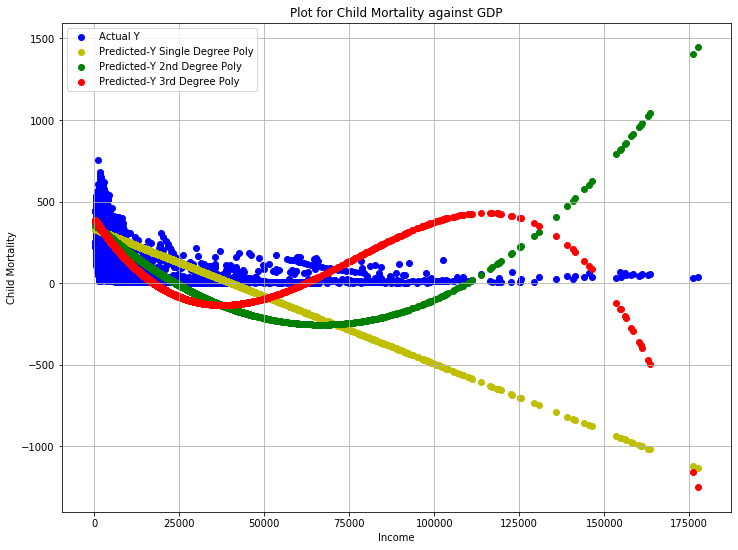

In [8]:

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.scatter(x = gdp_child_mor_table["income"], 
            y = gdp_child_mor_table[Y_var_name],
            c='b',
            label='Actual Y')

plt.scatter(x = gdp_child_mor_table["income"], 
            y = Y,
            c='y',
            label='Predicted-Y Single Degree Poly')

plt.scatter(x = gdp_child_mor_table["income"], 
            y = Y_poly,
            c='g',
            label='Predicted-Y 2nd Degree Poly')


plt.scatter(x = gdp_child_mor_table["income"], 
            y = Y_poly_2,
            c='r',
            label='Predicted-Y 3rd Degree Poly')

plt.xlabel('Income')
plt.ylabel('Child Mortality')


plt.title('Plot for Child Mortality against GDP')
plt.grid(True)
plt.legend()
plt.show()

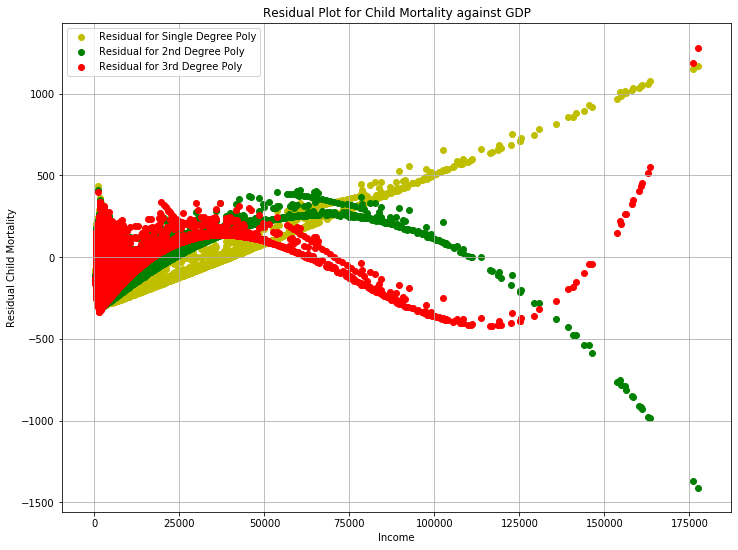

In [9]:

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.scatter(x = gdp_child_mor_table["income"], 
            y = gdp_child_mor_table[Y_var_name] - Y,
            c='y',
            label='Residual for Single Degree Poly')


plt.scatter(x = gdp_child_mor_table["income"], 
            y = gdp_child_mor_table[Y_var_name] - Y_poly,
            c='g',
            label='Residual for 2nd Degree Poly')

plt.scatter(x = gdp_child_mor_table["income"], 
            y = gdp_child_mor_table[Y_var_name] - Y_poly_2,
            c='r',
            label='Residual for 3rd Degree Poly')


plt.xlabel('Income')
plt.ylabel('Residual Child Mortality')

plt.title('Residual Plot for Child Mortality against GDP')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
gdp_child_mor_table["log_income"] = 1 / np.log(gdp_child_mor_table["income"])

In [11]:
X = [[x] for x in gdp_child_mor_table["log_income"]]
reg = LinearRegression().fit(X, gdp_child_mor_table[Y_var_name])
Y = reg.predict(X)

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
reg = LinearRegression().fit(X_poly, gdp_child_mor_table[Y_var_name])
Y_poly = reg.predict(X_poly)

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X) 
reg = LinearRegression().fit(X_poly, gdp_child_mor_table[Y_var_name])
Y_poly_2= reg.predict(X_poly)

In [12]:
print("Mean square error for linear 1 degree linear regression : ", \
      mean_squared_error(gdp_child_mor_table[Y_var_name], Y))
print("Mean square error for linear 2 degree linear regression : ", \
      mean_squared_error(gdp_child_mor_table[Y_var_name], Y_poly))
print("Mean square error for linear 3 degree linear regression : ", \
      mean_squared_error(gdp_child_mor_table[Y_var_name], Y_poly_2))

Mean square error for linear 1 degree linear regression :  10252.523752002628
Mean square error for linear 2 degree linear regression :  9731.74603221738
Mean square error for linear 3 degree linear regression :  9118.267658465405


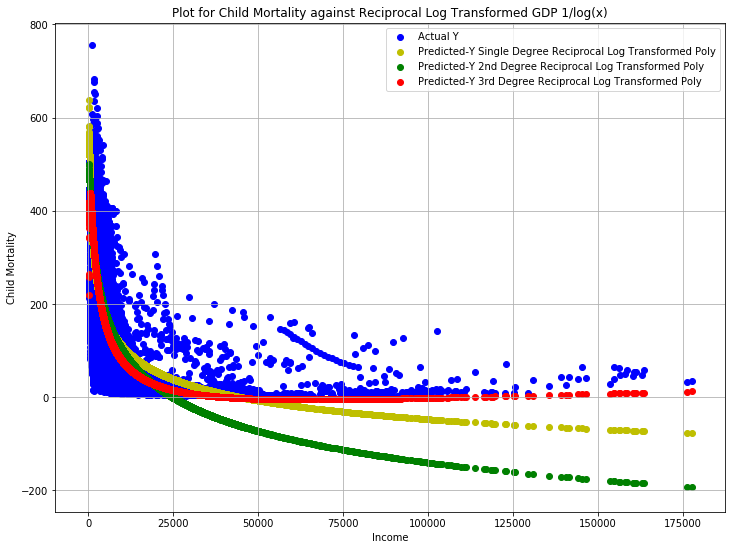

In [13]:

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
plt.scatter(x = gdp_child_mor_table["income"], 
            y = gdp_child_mor_table[Y_var_name],
            c='b',
            label='Actual Y')

plt.scatter(x = gdp_child_mor_table["income"], 
            y = Y,
            c='y',
            label='Predicted-Y Single Degree Reciprocal Log Transformed Poly')

plt.scatter(x = gdp_child_mor_table["income"], 
            y = Y_poly,
            c='g',
            label='Predicted-Y 2nd Degree Reciprocal Log Transformed Poly')


plt.scatter(x = gdp_child_mor_table["income"], 
            y = Y_poly_2,
            c='r',
            label='Predicted-Y 3rd Degree Reciprocal Log Transformed Poly')

plt.xlabel('Income')
plt.ylabel('Child Mortality')


plt.title('Plot for Child Mortality against Reciprocal Log Transformed GDP 1/log(x)')
plt.grid(True)
plt.legend()
plt.show()

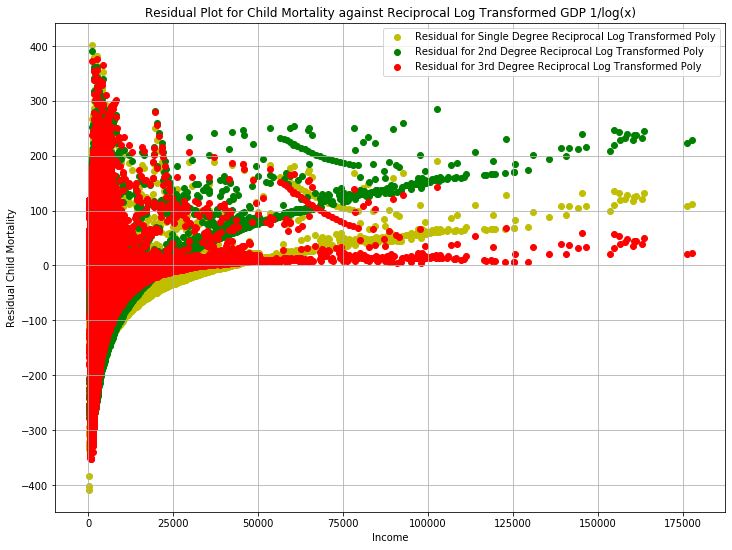

In [14]:

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.scatter(x = gdp_child_mor_table["income"], 
            y = gdp_child_mor_table[Y_var_name] - Y,
            c='y',
            label='Residual for Single Degree Reciprocal Log Transformed Poly')


plt.scatter(x = gdp_child_mor_table["income"], 
            y = gdp_child_mor_table[Y_var_name] - Y_poly,
            c='g',
            label='Residual for 2nd Degree Reciprocal Log Transformed Poly')

plt.scatter(x = gdp_child_mor_table["income"], 
            y = gdp_child_mor_table[Y_var_name] - Y_poly_2,
            c='r',
            label='Residual for 3rd Degree Reciprocal Log Transformed Poly')


plt.xlabel('Income')
plt.ylabel('Residual Child Mortality')

plt.title('Residual Plot for Child Mortality against Reciprocal Log Transformed GDP 1/log(x)')
plt.legend()
plt.grid(True)
plt.show()